В данном Юпитер ноутбуке мы убеждаемся в том, что искажение перспективы и афинные преобразования это по сути примитивные матричные операции. Что бы привести афинное преобразование к искажению перспективы в конец матрицы нужно доавбитьстроку [0,0,1], то есть: 

$$
\begin{pmatrix}
0.96592583 & -0.25881905 & 121.19398449\\
-0.25881905 & 0.96592583 &  -152.55970616
\end{pmatrix} =
\begin{pmatrix}
0.96592583 & -0.25881905 & 121.19398449\\
-0.25881905 & 0.96592583 &  -152.55970616 \\
0. & 0. & 1.
\end{pmatrix}
$$

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [46]:
img1_ = cv2.imread('0_0.jpg')

In [47]:
#img1_=img1_[:,:,[1,0,2]]

In [48]:
#img1_=img1_[:,:,[2]]

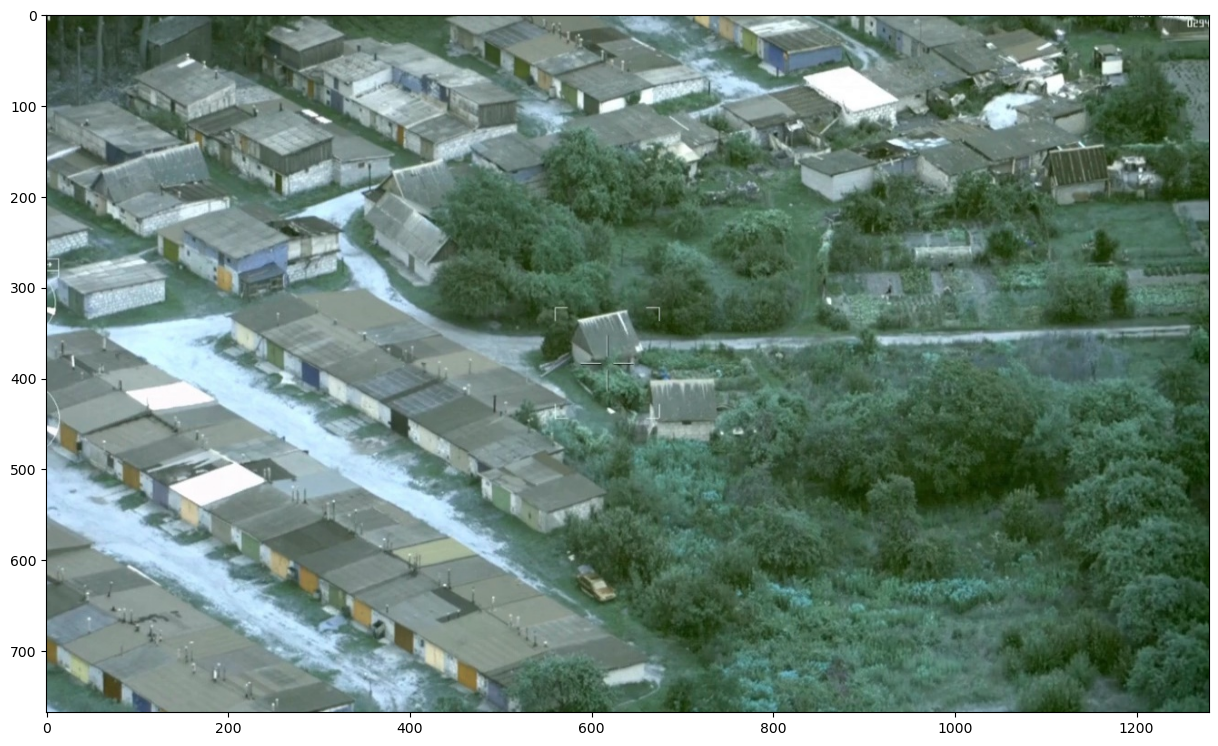

In [49]:
plt.figure(figsize=(15,20))
plt.imshow(img1_,cmap="gray")

In [110]:
zero = np.zeros_like(img1_)

In [111]:
zero[:,:,[1]] = 255
zero[:,:,[0]] = 0
zero[:,:,[2]] = 0
#0 - R 1 - G 2 - B

In [112]:
zero[298:302,:,[0,1]]=255,255

In [113]:
zero[:,599:601,[0,1]]=255,255

In [114]:
zero[:,1000:1020,[1,2]]=255,255

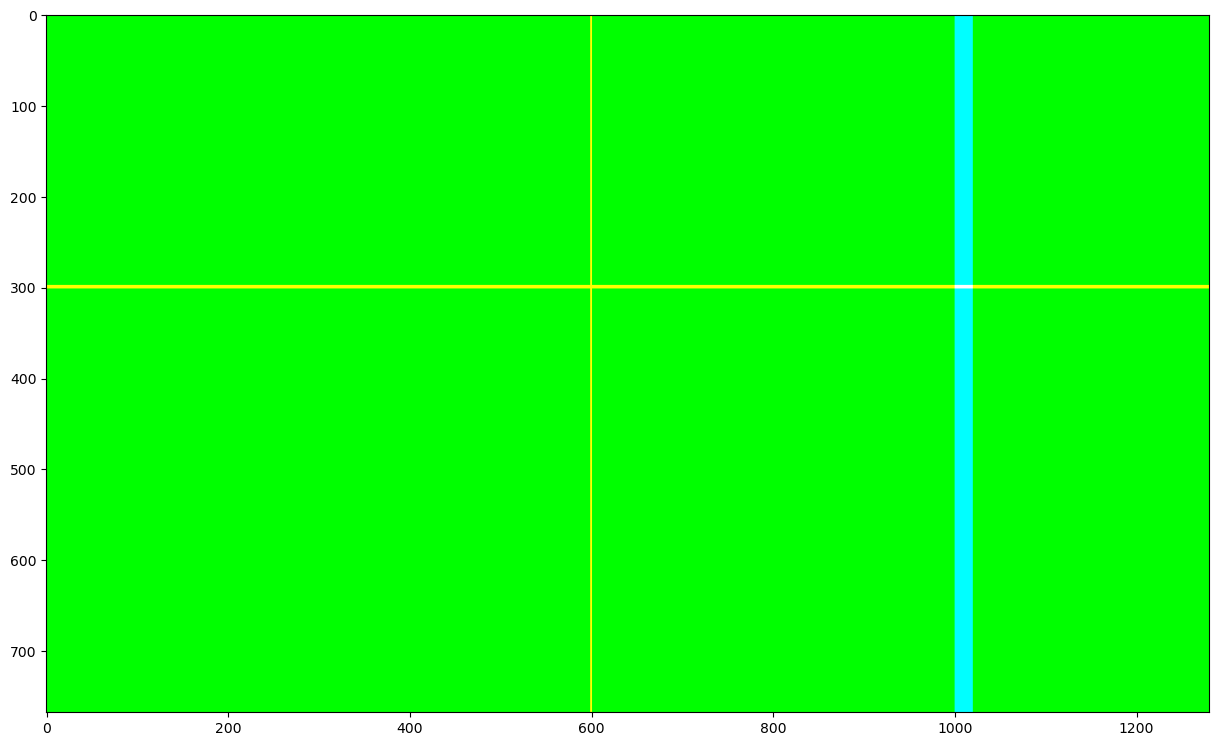

In [115]:
plt.figure(figsize=(15,20))
plt.imshow(zero)

In [135]:
#Поворт на 15 градусов в право относительно центра
(h, w) = zero.shape[0:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 15, 1)
# img2 = cv2.warpAffine(zero, M, (w, h))

In [136]:
M

array([[  0.96592583,   0.25881905, -77.57904214],
       [ -0.25881905,   0.96592583, 178.72867157]])

In [138]:
def getRotationMatrix2D(center, c= 15, scale=1.0):
    Cx,Cy=center[0],center[1]
    L = np.radians(c)  
    a=scale*np.cos(L)
    b=scale*np.sin(L)
    return np.array([[a,b,(1-a)*Cx-b*Cy],[-b,a,b*Cx+(1-a)*Cy]])

In [139]:
getRotationMatrix2D(center, 15, 1)

array([[  0.96592583,   0.25881905, -77.57904214],
       [ -0.25881905,   0.96592583, 178.72867157]])

In [142]:
M=np.array([[ 1,   0, 100],
       [0,  1, 200]],dtype=np.float32)
img2 = cv2.warpAffine(zero, M, (w, h))

In [143]:
plt.figure(figsize=(15,20))
plt.imshow(img2)

In [221]:
J=np.append(M,np.array([0.0,0.0,1])).reshape(3,3)

In [222]:
img2 = cv2.warpPerspective(zero, J, (w, h))

In [223]:
plt.figure(figsize=(15,20))
plt.imshow(img2)

In [232]:
angle=np.radians(10)

In [300]:
M=np.array([[np.cos(angle), np.sin(angle), 0],
         [-np.sin(angle), np.cos(angle), 0],
        [0.0,0.0,1]],dtype=np.float32)
T = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])

S = np.array([
    [.9, 0, 0],
    [0, .9, 0],
    [0, 0, 1]
])


In [301]:
A = T@J@S@np.linalg.inv(T)


In [302]:
img2 = cv2.warpPerspective(zero, A, (w, h))

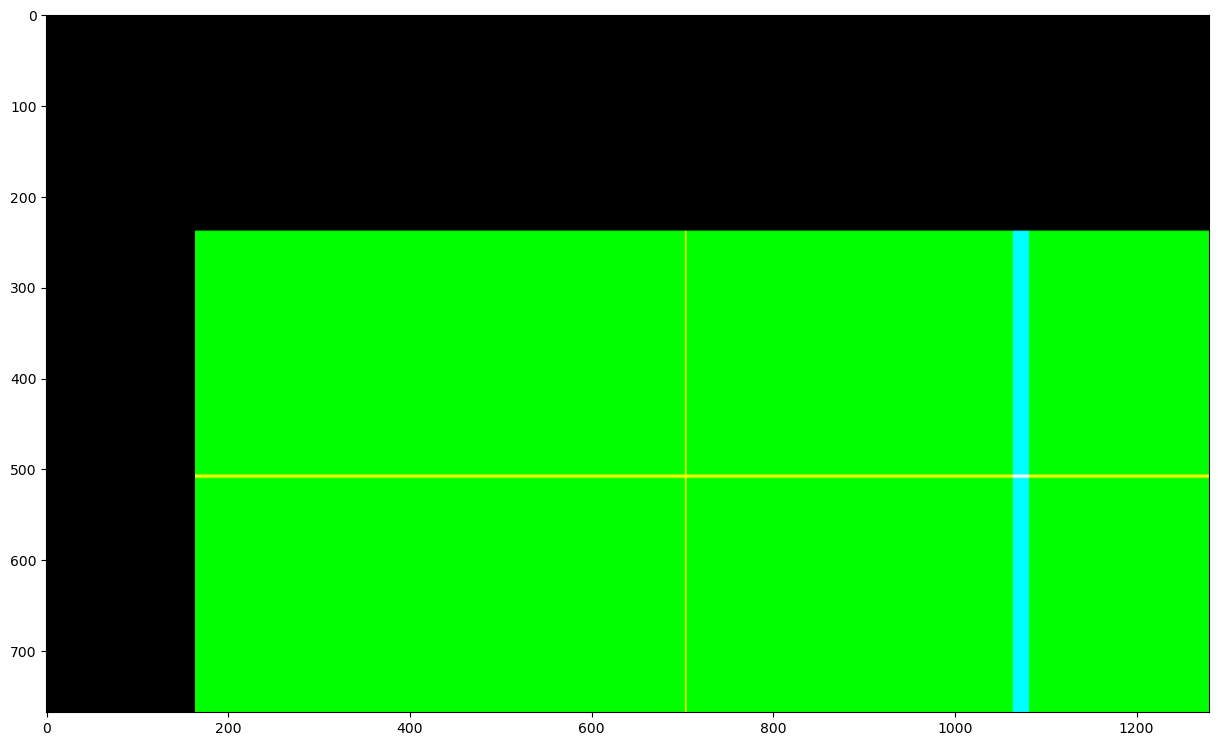

In [303]:
plt.figure(figsize=(15,20))
plt.imshow(img2)

In [304]:
resized = cv2.resize(zero, (640,480), interpolation = cv2.INTER_AREA)

In [305]:
plt.figure(figsize=(15,20))
plt.imshow(resized[100:300,:])

In [2]:
#cd /media/peleng/NewVolume/13062022/python_folder/DZ_29_test_detector


In [3]:
#img = cv2.imread('0_0.jpg')

In [11]:
img1_ = cv2.imread('0_0.jpg')

In [12]:
img1_.shape

(768, 1280, 3)

In [99]:
#Поворт на 15 градусов в право относительно центра
(h, w) = img1_.shape[0:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 10, 1.0)
img2 = cv2.warpAffine(img1_, M, (w, h))

In [102]:
H=np.append(M,np.array([0,0,1])).reshape(3,3)

In [113]:
center[0],center[1]

(640, 384)

In [114]:
L = np.radians(10)

In [125]:
def getRotationMatrix2D(center, c= 10, scale=1.0):
    Cx,Cy=center[0],center[1]
    L = np.radians(c)  
    a=scale*np.cos(L)
    b=scale*np.sin(L)
    return np.array([[a,b,(1-a)*Cx-b*Cy],[-b,a,b*Cx+(1-a)*Cy]])
    


In [126]:
J = getRotationMatrix2D(center, 10, 1.0)

In [129]:
J=np.append(J,np.array([0,0,1])).reshape(3,3)

In [131]:
# img2 = cv2.warpAffine(img1_, J, (w, h))
# vis = np.concatenate((img1_, img2), axis=1)
# plt.figure(figsize=(15,20))
# plt.imshow(vis)

In [132]:
#angle = np.radians(10)

In [133]:
#angle

In [134]:
# M=np.array([[np.cos(angle), np.sin(angle), 0],
#          [-np.sin(angle), np.cos(angle), 0],
#         [0.0,0.0,1]],dtype=np.float32)
T = np.array([
    [1, 0, 100],
    [0, 1, -300],
    [0, 0, 1]
])

S = np.array([
    [1.1, 0, 0],
    [0, 1.1, 0],
    [0, 0, 1]
])

A = T@J@S@np.linalg.inv(T)
Ainv = np.linalg.inv(A)

In [135]:
img2 = cv2.warpPerspective(img1_, A, (w, h))

In [136]:
vis = np.concatenate((img1_, img2), axis=1)
plt.figure(figsize=(15,20))
plt.imshow(vis)

In [5]:
M_=np.array(M)

In [6]:
M_=np.concatenate((M_,[[0,0,1]]))

In [7]:
M_.shape

(3, 3)

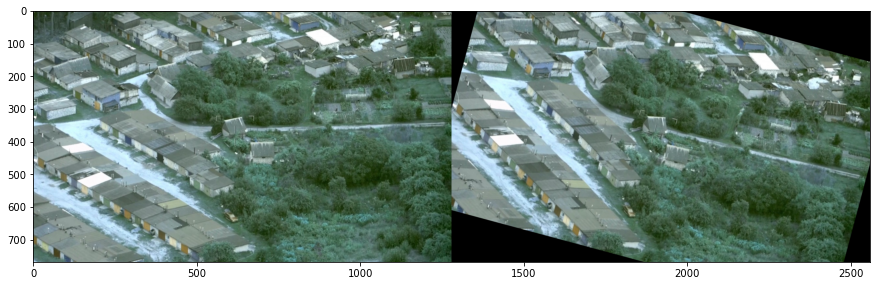

In [8]:
vis = np.concatenate((img1_, img2), axis=1)
plt.figure(figsize=(15,20))
plt.imshow(vis)

In [9]:
M_ = np.array([[   1,   0,  50],
       [   0,    1, 100],
       [   0.        ,    0.0        ,    1.        ]])

In [10]:
M_.shape

(3, 3)

In [12]:
imgOutput = cv2.warpPerspective(img1_,M_,(int(w),int(h)))

In [13]:
plt.figure(figsize=(15,20))
plt.imshow(imgOutput)

In [14]:
imgOutput = cv2.warpPerspective(img1_,M_,(w,h))

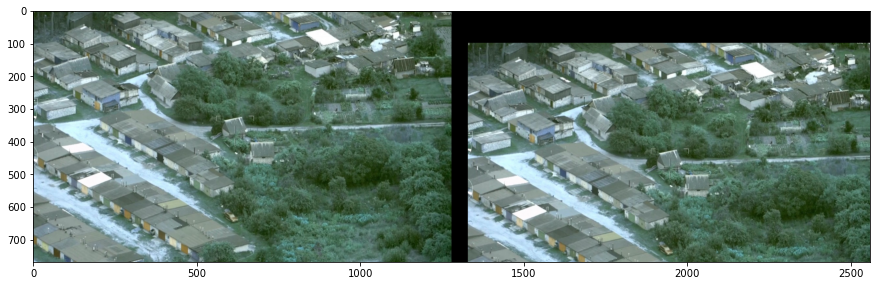

In [15]:
vis = np.concatenate((img1_, imgOutput), axis=1)
plt.figure(figsize=(15,20))
plt.imshow(vis)

In [16]:
plt.figure(figsize=(15,20))
plt.imshow(img2)

In [49]:
#img1_[:,:,0]=img1_[:,:,0]@M_
#img1_[:,:,1]=img1_[:,:,1]@M_
#img1_[:,:,2]=img1_[:,:,2]@M_




In [17]:
img2 = cv2.warpAffine(img1_, M, (w, h))

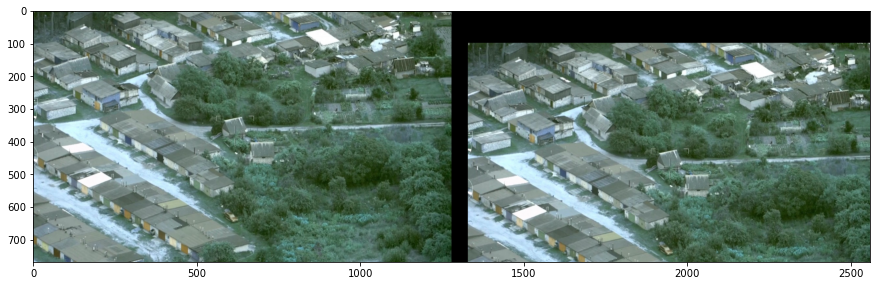

In [18]:
vis = np.concatenate((img1_, imgOutput), axis=1)
plt.figure(figsize=(15,20))
plt.imshow(vis)

---

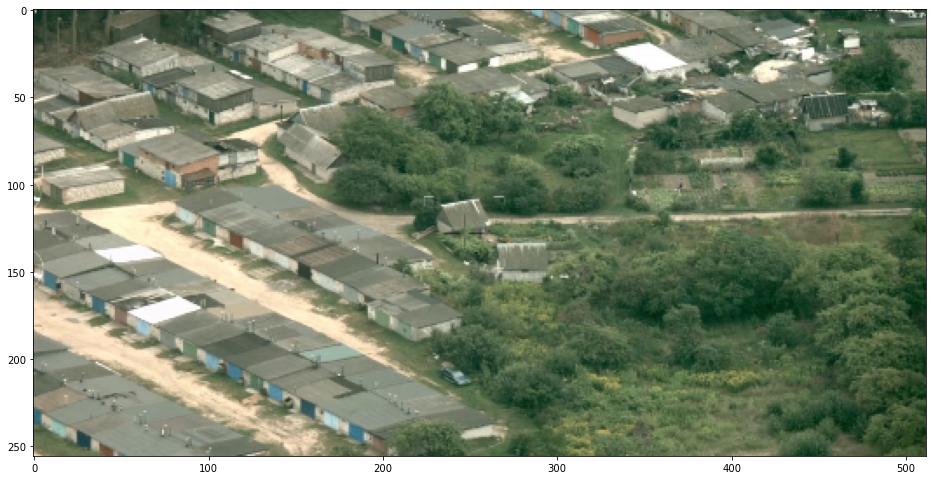

In [137]:
image_path = '0_0.jpg'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (512, 256))
    
fig, ax = plt.subplots(figsize=(16,12))
ax.imshow(image)
plt.show()

In [138]:
def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    return np.vstack((coords, np.ones(coords.shape[1]))).astype(np.int) if homogenous else coords

In [139]:
height, width = image.shape[:2]
tx, ty = np.array((width // 2, height // 2))
angle = np.radians(45)
scale = 2.0

In [140]:
angle

0.7853981633974483

In [141]:
scale

2.0

In [142]:
R = np.array([
    [np.cos(angle), np.sin(angle), 0],
    [-np.sin(angle), np.cos(angle), 0],
    [0, 0, 1]
])

T = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])

S = np.array([
    [scale, 0, 0],
    [0, scale, 0],
    [0, 0, 1]
])

A = T@R@S@np.linalg.inv(T)
Ainv = np.linalg.inv(A)

In [143]:
Ainv@A

array([[1.00000000e+00, 1.01465364e-17, 0.00000000e+00],
       [1.01465364e-17, 1.00000000e+00, 6.21724894e-15],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [150]:
width, height

(512, 256)

In [145]:
coords = get_grid(width, height, True)
x2, y2 = coords[0], coords[1]

C:\Users\BIASPA~1\AppData\Local\Temp/ipykernel_12600/117688614.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.vstack((coords, np.ones(coords.shape[1]))).astype(np.int) if homogenous else coords


In [154]:
y2.reshape(256,-1)

array([[  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       ...,
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255]])

In [155]:
# set up pixel coordinate I'(x, y)
x2, y2 = coords[0], coords[1]

# Apply inverse transform and round it (nearest neighbour interpolation)
warp_coords = (Ainv@coords).astype(np.int)
x1, y1 = warp_coords[0, :], warp_coords[1, :]

# Get pixels within image boundaries
indices = np.where((x1 >= 0) & (x1 < width) &
                   (y1 >= 0) & (y1 < height))

xpix1, ypix1 = x2[indices], y2[indices]
xpix2, ypix2 = x1[indices], y1[indices]

C:\Users\BIASPA~1\AppData\Local\Temp/ipykernel_12600/46522470.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warp_coords = (Ainv@coords).astype(np.int)


In [156]:
width*height ==coords.shape[1]

True

In [157]:
coords[0].shape, coords[1].shape

((131072,), (131072,))

In [160]:
unique, counts = np.unique(coords[0], return_counts=True)
#print(np.asarray((unique, counts)).T)

In [161]:
unique, counts = np.unique(coords[1], return_counts=True)
#print(np.asarray((unique, counts)).T)

In [162]:
ypix2.shape

(130652,)

In [163]:
xpix2.shape

(130652,)

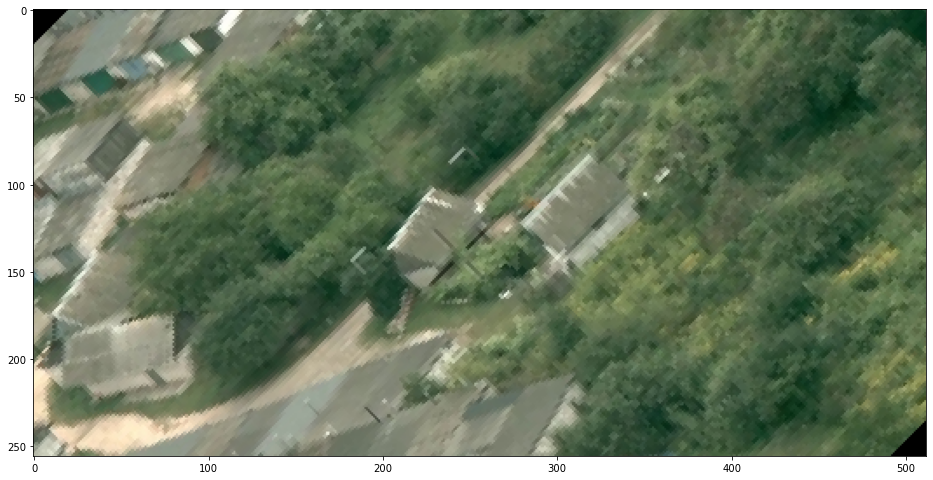

In [164]:
canvas = np.zeros_like(image)
canvas[ypix1, xpix1] = image[ypix2,xpix2]
fig, ax = plt.subplots(figsize=(16,12))
ax.imshow(canvas)

In [37]:
a = np.array([[1,1,1],[2,2,2],[3,3,3]])

In [49]:
a

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [50]:
canvas = np.zeros_like(a)
x1 = np.array([0,1,2])
y1 = np.array([0,1,2])

In [51]:
canvas[x1,y1] = a[x1,y1]

In [52]:
canvas

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [26]:
(h, w) = image.shape[0:2]
imgOutput = cv2.warpPerspective(image,A,(w,h))

In [27]:
imgOutput.shape

(256, 512, 3)

In [28]:
fig, ax = plt.subplots(figsize=(16,12))
ax.imshow(imgOutput)

---